In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **loading data**

In [25]:
df_transactions = pd.read_csv ("/content/Transacation.csv")
df_purchases = pd.read_csv ('/content/Purchase.csv')
df_tickets = pd.read_csv ('/content/Tickets.csv')

## **Data Representation**

In [26]:
df_transactions.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_ID,Ticket_ID,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,8/12/2023,12:41:11,P_01,Ticket_1,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,P_02,Ticket_2,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,P_03,Ticket_3,2/1/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,P_04,Ticket_4,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,P_05,Ticket_5,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [27]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction_ID       31653 non-null  object
 1   Date_of_Purchase     31653 non-null  object
 2   Time_of_Purchase     31653 non-null  object
 3   Purchase_ID          31653 non-null  object
 4   Ticket_ID            31653 non-null  object
 5   Date_of_Journey      31653 non-null  object
 6   Departure_Time       31653 non-null  object
 7   Arrival_Time         31653 non-null  object
 8   Actual_Arrival_Time  29773 non-null  object
 9   Journey_Status       31653 non-null  object
 10  Reason_for_Delay     4172 non-null   object
 11  Refund_Request       31653 non-null  object
dtypes: object(12)
memory usage: 2.9+ MB


# **Data Cleaning**

In [28]:
df_merged = df_transactions.merge(df_purchases, on="Purchase_ID", how="left")
df_merged = df_merged.merge(df_tickets, on="Ticket_ID", how="left")

In [29]:
#   Change Type
df_merged['Date_of_Journey'] = pd.to_datetime(df_merged['Date_of_Journey'], format='%m/%d/%Y')

# Combine Date_of_Journey with time strings and convert to datetime
df_merged['Departure_DateTime'] = pd.to_datetime(
  df_merged['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df_merged['Departure_Time'],
  errors='coerce'
  )

df_merged['Scheduled_Arrival_DateTime'] = pd.to_datetime(
  df_merged['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df_merged['Arrival_Time'],
  errors='coerce'
  )

df_merged['Actual_Arrival_DateTime'] = pd.to_datetime(
  df_merged['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df_merged['Actual_Arrival_Time'],
  errors='coerce'
  )

# Handle cases where arrival is on the next day
sched_arrival_lt_depart = df_merged['Scheduled_Arrival_DateTime'] < df_merged['Departure_DateTime']
df_merged.loc[sched_arrival_lt_depart, 'Scheduled_Arrival_DateTime'] = \
   df_merged.loc[sched_arrival_lt_depart, 'Scheduled_Arrival_DateTime'] + pd.Timedelta(days=1)

actual_arrival_lt_depart = df_merged['Actual_Arrival_DateTime'] < df_merged['Departure_DateTime']
df_merged.loc[actual_arrival_lt_depart, 'Actual_Arrival_DateTime'] = \
   df_merged.loc[actual_arrival_lt_depart, 'Actual_Arrival_DateTime'] + pd.Timedelta(days=1)

In [30]:
df_merged['Reason_for_Delay'] = df_merged['Reason_for_Delay'].fillna('Not Applicable')
df_merged.loc[df_merged['Journey_Status'] == 'On Time', 'Reason_for_Delay'] = 'On Time'
df_merged['Refund_Request'] = df_merged['Refund_Request'].fillna('No')
df_merged['Railcard'] = df_merged['Railcard'].fillna('None')

In [31]:
df_merged.to_csv("cleaned_file.csv", index=False)

# **Data Analysis**

## 1- Analyzes and plots the top 10 most popular routes

/tmp/ipython-input-1068704045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_routes.values, y=popular_routes.index, palette='viridis')


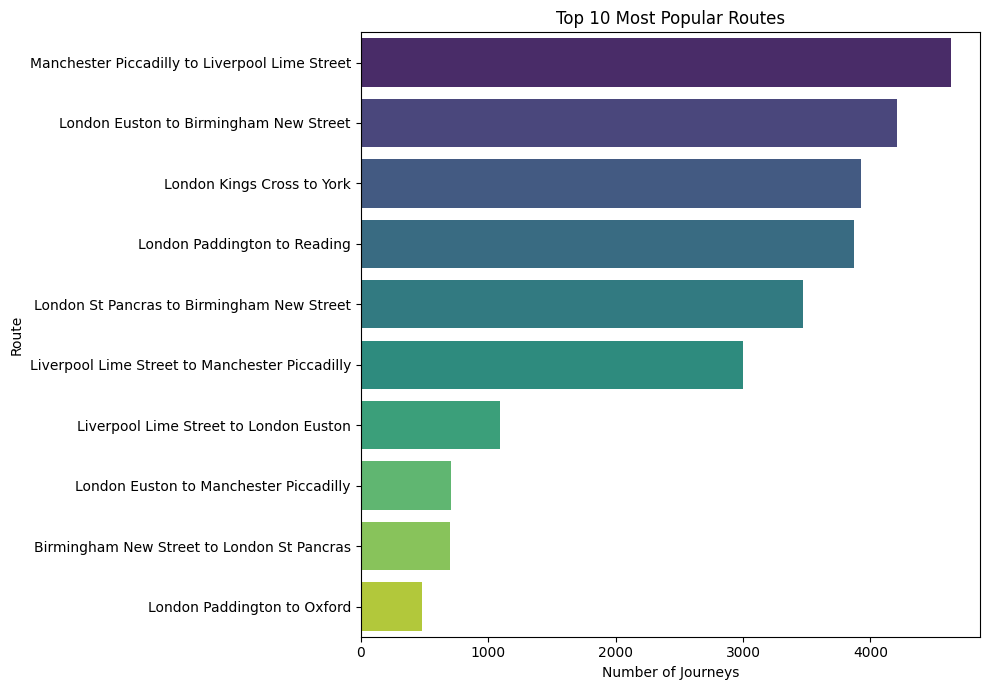

In [32]:
plt.figure(figsize=(10, 7))
sns.barplot(x=popular_routes.values, y=popular_routes.index, palette='viridis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Journeys')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

## 2- Analyzes and plots peak travel times by departure hour

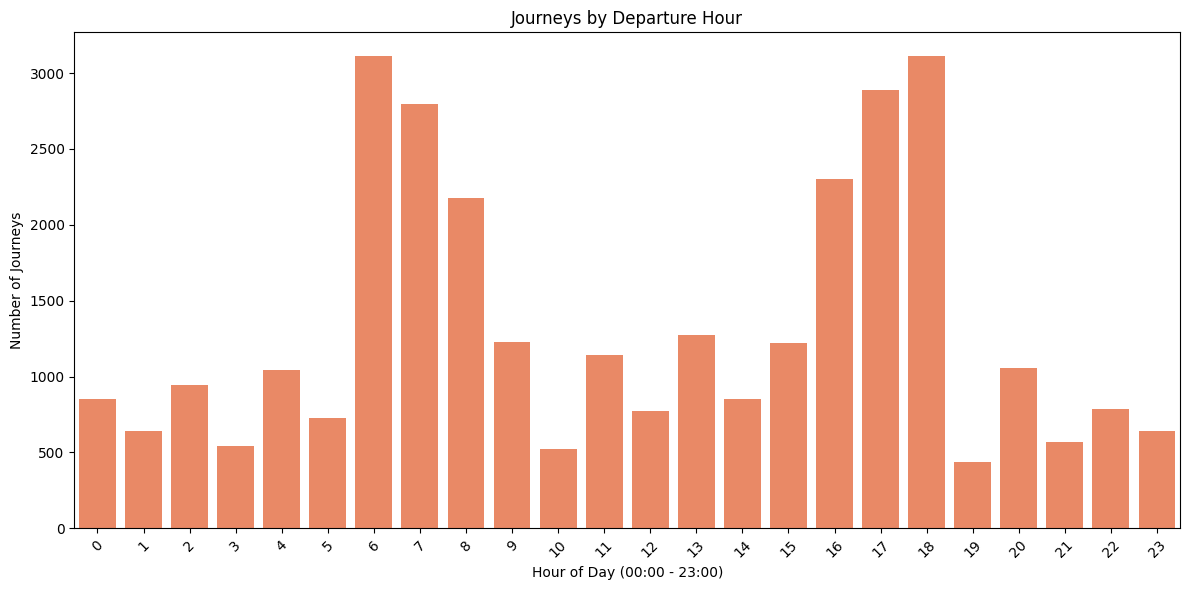

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=peak_times.index, y=peak_times.values, color='coral')
plt.title('Journeys by Departure Hour')
plt.xlabel('Hour of Day (00:00 - 23:00)')
plt.ylabel('Number of Journeys')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3- Analyzes and plots revenue by ticket class and type

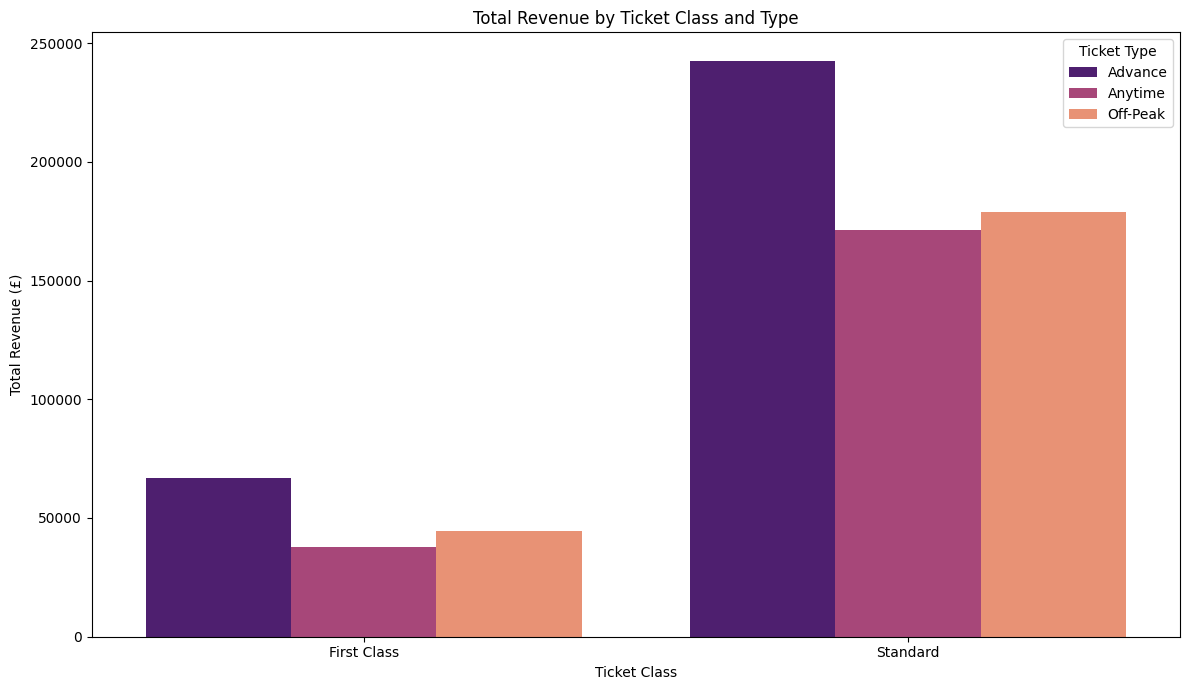

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(
  x='Ticket_Class',
  y='Price',
  hue='Ticket_Type',
  data=revenue_by_class_type,
palette='magma'
)
plt.title('Total Revenue by Ticket Class and Type')
plt.xlabel('Ticket Class')
plt.ylabel('Total Revenue (£)')
plt.legend(title='Ticket Type')
plt.tight_layout()
plt.show()

## 4- Analyzes and plots on-time performance

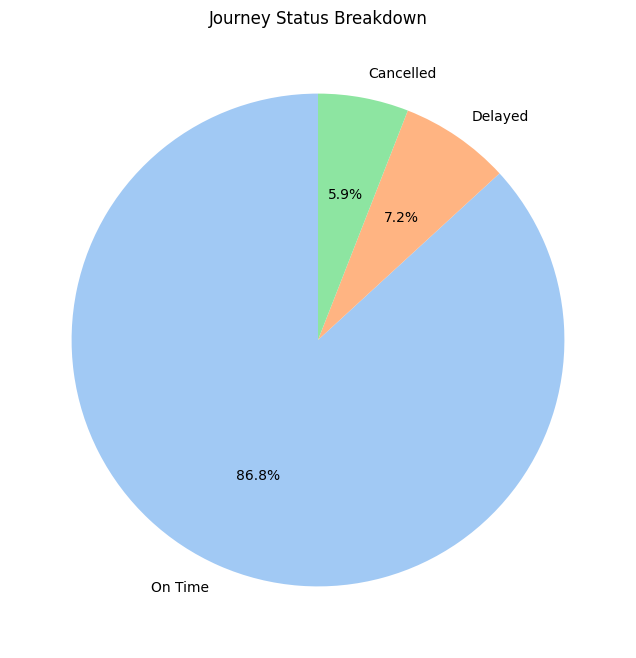

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
  journey_status_counts,
  labels=journey_status_counts.index,
  autopct='%1.1f%%',
  colors=sns.color_palette('pastel'),
  startangle=90
)
plt.title('Journey Status Breakdown')
plt.show()

## 5- Analyzes and plots the main contributing factors for delays

/tmp/ipython-input-1008725491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_reasons.values, y=top_n_reasons.index, palette='rocket')


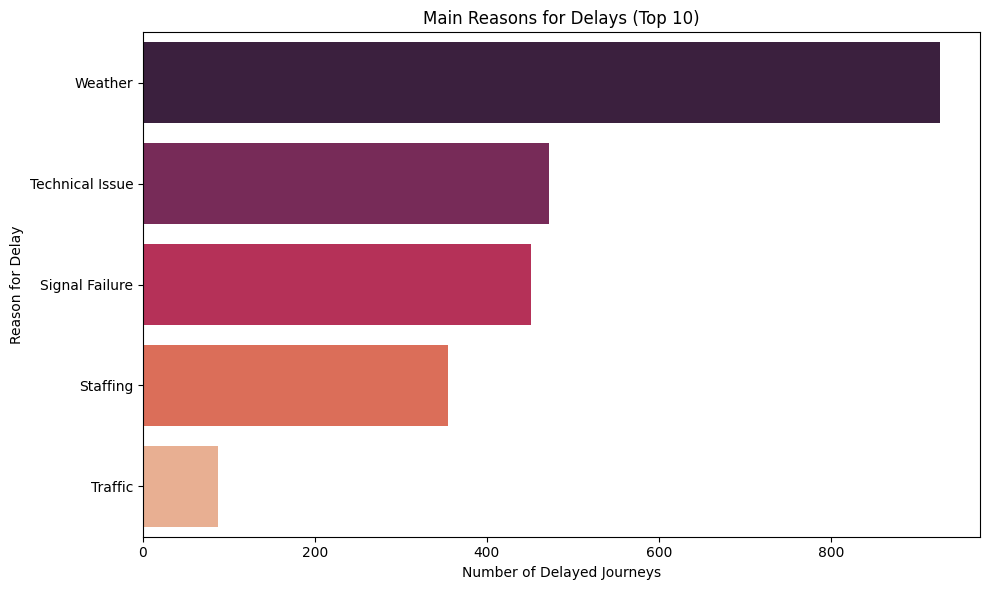

In [ ]:
plt.figure(figsize=(10, 6))
top_n_reasons = delay_reasons.nlargest(10)
sns.barplot(x=top_n_reasons.values, y=top_n_reasons.index, palette='rocket')
plt.title('Main Reasons for Delays (Top 10)')
plt.xlabel('Number of Delayed Journeys')
plt.ylabel('Reason for Delay')
plt.tight_layout()
plt.show()